In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../data/cleaned/cleaned_flight_data.csv')

C:\Users\Playtime\AppData\Local\Temp\ipykernel_21356\1640764571.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/cleaned/cleaned_flight_data.csv')


In [4]:
data

,from_airport_code,from_country,dest_airport_code,dest_country,airline_number,airline_name,departure_time,arrival_time,duration,stops,...,avg_co2_emission_for_this_route,co2_percentage,airline_name_1,airline_name_2,airline_name_3,airline_name_4,airline_name_5,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
0,ALG,Algeria,AEP,Argentina,multi,Air France| Iberia| LATAM,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,...,1320000.0,0,Air France,Iberia,LATAM,0,0,1.114152,926.315789,1032.056294
1,ALG,Algeria,AEP,Argentina,multi,Air France| Iberia| LATAM,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,...,1320000.0,-9,Air France,Iberia,LATAM,0,0,1.114152,838.596491,934.323690
2,ALG,Algeria,AEP,Argentina,multi,Air France| LATAM,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,...,1320000.0,-5,Air France,LATAM,0,0,0,1.191589,815.686275,971.962617
3,ALG,Algeria,AEP,Argentina,multi,Air France| LATAM,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,...,1320000.0,2,Air France,LATAM,0,0,0,1.104651,945.263158,1044.186047
4,ALG,Algeria,AEP,Argentina,multi,Lufthansa| LATAM,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,...,1320000.0,4,Lufthansa,LATAM,0,0,0,1.143281,896.753247,1025.241277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997496,BOM,India,SYD,Australia,EK,Emirates,2022-05-01 19:20:00,2022-05-02 22:05:00,1335,1,...,1133000.0,38,Emirates,0,0,0,0,1.013667,1173.782772,1189.825361
997497,BOM,India,SYD,Australia,EK,Emirates,2022-05-01 22:20:00,2022-05-02 22:05:00,1155,1,...,1133000.0,39,Emirates,0,0,0,0,0.876993,1370.562771,1201.974184
997498,BOM,India,SYD,Australia,multi,Etihad| Virgin Australia,2022-05-01 04:35:00,2022-05-02 09:55:00,1490,2,...,1133000.0,19,Etihad,Virgin Australia,0,0,0,1.121988,908.724832,1019.578313
997499,BOM,India,SYD,Australia,multi,Air India| SriLankan,2022-05-01 06:10:00,2022-05-02 14:55:00,1695,2,...,1133000.0,-2,Air India,SriLankan,0,0,0,1.239035,648.377581,803.362573


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997501 entries, 0 to 997500
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                997501 non-null  object 
 1   from_country                     997501 non-null  object 
 2   dest_airport_code                997501 non-null  object 
 3   dest_country                     997501 non-null  object 
 4   airline_number                   997501 non-null  object 
 5   airline_name                     997501 non-null  object 
 6   departure_time                   997501 non-null  object 
 7   arrival_time                     997501 non-null  object 
 8   duration                         997501 non-null  int64  
 9   stops                            997501 non-null  int64  
 10  price                            997501 non-null  float64
 11  currency                         997501 non-null  object 
 12  co

In [6]:
data['departure_time'] = pd.to_datetime(data['departure_time'])
data['arrival_time'] = pd.to_datetime(data['arrival_time'])

In [7]:
data.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'airline_number', 'airline_name', 'departure_time',
       'arrival_time', 'duration', 'stops', 'price', 'currency',
       'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage',
       'airline_name_1', 'airline_name_2', 'airline_name_3', 'airline_name_4',
       'airline_name_5', 'duration_by_price', 'co2_emissions_per_duration',
       'emissions_to_price_ratio'],
      dtype='object')

# EDA

In [8]:
data.describe()

,departure_time,arrival_time,duration,stops,price,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
count,997501,997501,997501.000000,997501.000000,997501.000000,9.975010e+05,9.975010e+05,997501.000000,997501.000000,997501.000000,997501.000000
mean,2022-06-07 22:13:19.080823808,2022-06-08 21:20:20.181273344,1469.580183,1.656648,1763.383824,1.112219e+06,9.055379e+05,36.345889,1.469655,758.396481,863.955599
min,2022-04-30 00:25:00,2022-04-30 04:10:00,55.000000,0.000000,9.000000,4.300000e+04,5.300000e+04,-82.000000,0.039249,40.566038,39.114974
25%,2022-05-03 20:55:00,2022-05-05 08:05:00,975.000000,1.000000,621.000000,5.260000e+05,4.250000e+05,-2.000000,0.683183,482.861401,486.486486
50%,2022-05-15 12:20:00,2022-05-16 12:35:00,1410.000000,2.000000,1189.000000,9.580000e+05,9.070000e+05,10.000000,1.136293,698.899826,753.567508
75%,2022-07-28 18:15:00,2022-07-29 15:55:00,1880.000000,2.000000,2127.000000,1.369000e+06,1.233000e+06,34.000000,1.837406,905.915493,1132.492114
max,2022-08-28 23:59:00,2022-09-02 06:55:00,6095.000000,6.000000,33750.000000,1.404400e+07,4.227400e+06,2006.000000,29.250000,7935.294118,13888.888889
std,NaN,NaN,704.967843,0.650925,1985.995025,9.861775e+05,5.743847e+05,83.786483,1.253898,496.507980,509.675598


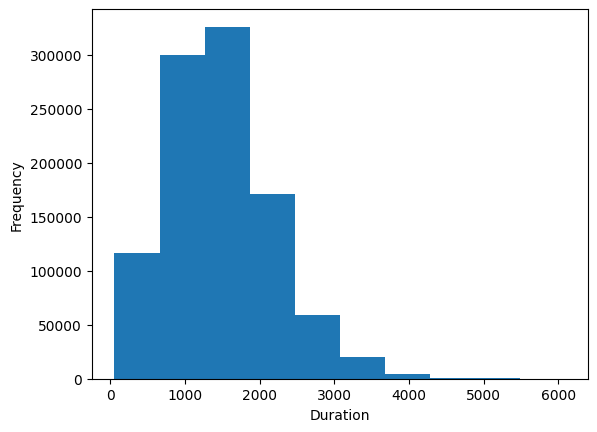

In [9]:
# Histogram
data['duration'].plot.hist()
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

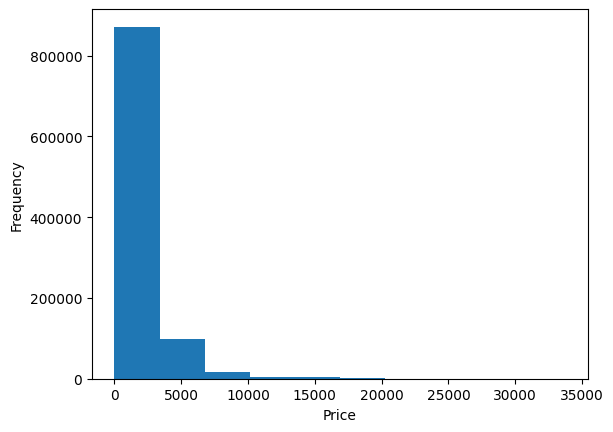

In [10]:
# Histogram
data['price'].plot.hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

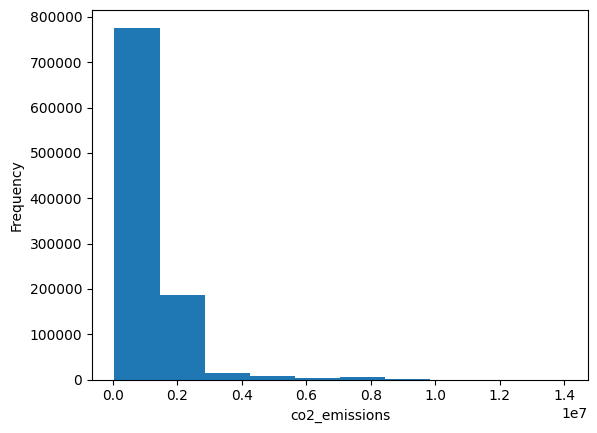

In [11]:
# Histogram
data['co2_emissions'].plot.hist()
plt.xlabel('co2_emissions')
plt.ylabel('Frequency')
plt.show()

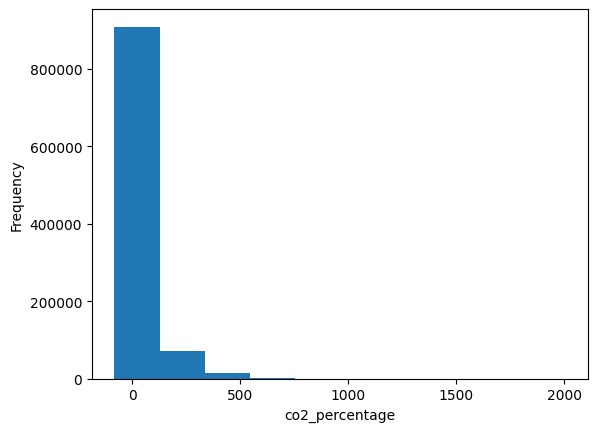

In [12]:
# Histogram
data['co2_percentage'].plot.hist()
plt.xlabel('co2_percentage')
plt.ylabel('Frequency')
plt.show()

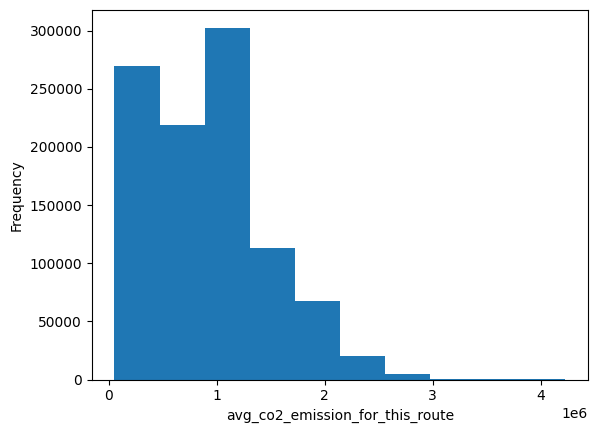

In [13]:
# Histogram
data['avg_co2_emission_for_this_route'].plot.hist()
plt.xlabel('avg_co2_emission_for_this_route')
plt.ylabel('Frequency')
plt.show()

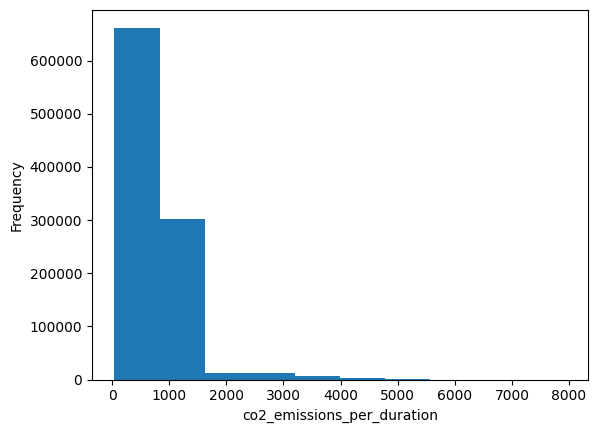

In [14]:
# Histogram
data['co2_emissions_per_duration'].plot.hist()
plt.xlabel('co2_emissions_per_duration')
plt.ylabel('Frequency')
plt.show()

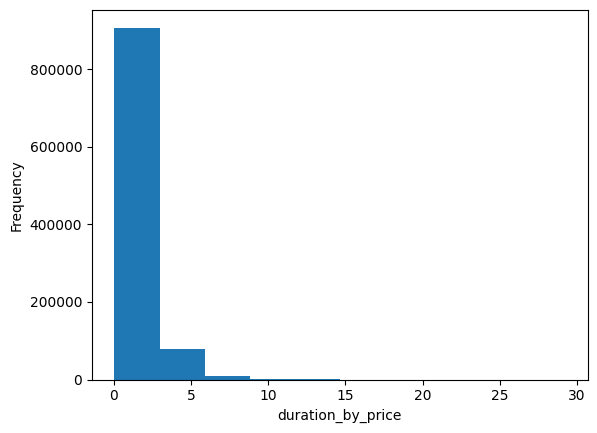

In [15]:
# Histogram
data['duration_by_price'].plot.hist()
plt.xlabel('duration_by_price')
plt.ylabel('Frequency')
plt.show()

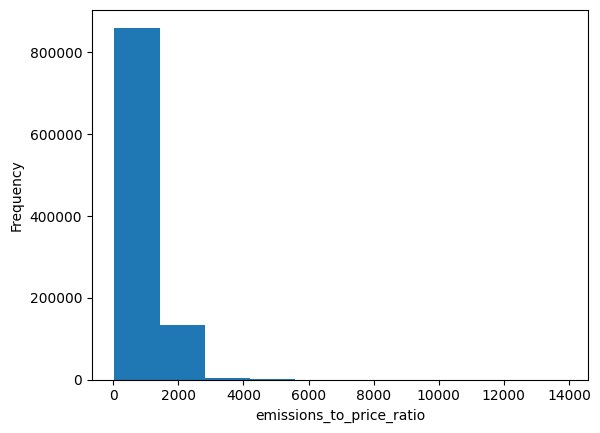

In [16]:
# Histogram
data['emissions_to_price_ratio'].plot.hist()
plt.xlabel('emissions_to_price_ratio')
plt.ylabel('Frequency')
plt.show()

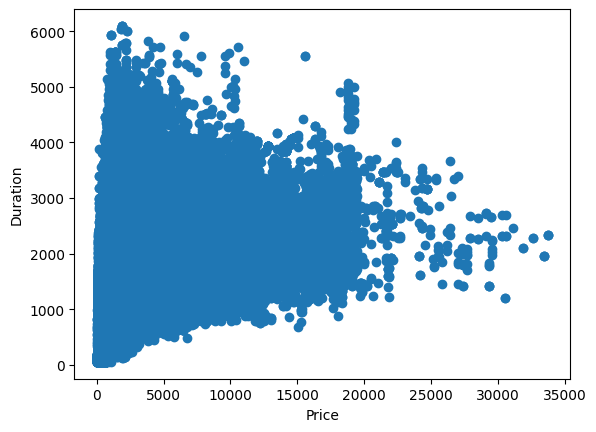

In [17]:
# Scatter Plot
plt.scatter(data['price'], data['duration'])
plt.xlabel('Price')
plt.ylabel('Duration')
plt.show()

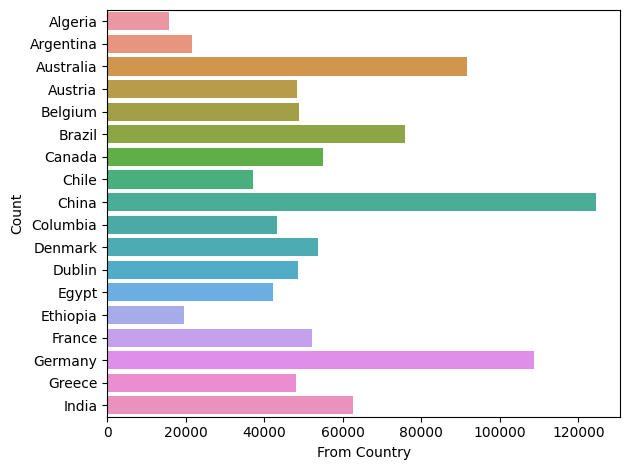

In [18]:
# Create countplot
sns.countplot(data=data, y='from_country',)#order by to show
plt.xlabel('From Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
country_counts = data['from_country'].value_counts()
print(country_counts)

from_country
China        124393
Germany      108670
Australia     91727
Brazil        75979
India         62550
Canada        55056
Denmark       53737
France        52263
Belgium       48776
Dublin        48634
Austria       48284
Greece        48084
Columbia      43221
Egypt         42315
Chile         37025
Argentina     21483
Ethiopia      19567
Algeria       15737
Name: count, dtype: int64


In [20]:
data.columns

Index(['from_airport_code', 'from_country', 'dest_airport_code',
       'dest_country', 'airline_number', 'airline_name', 'departure_time',
       'arrival_time', 'duration', 'stops', 'price', 'currency',
       'co2_emissions', 'avg_co2_emission_for_this_route', 'co2_percentage',
       'airline_name_1', 'airline_name_2', 'airline_name_3', 'airline_name_4',
       'airline_name_5', 'duration_by_price', 'co2_emissions_per_duration',
       'emissions_to_price_ratio'],
      dtype='object')

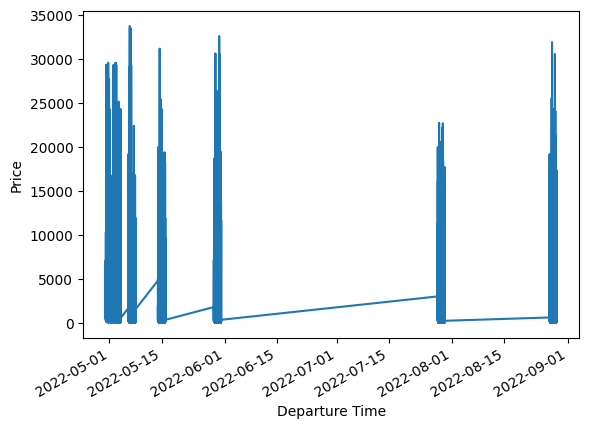

In [21]:
# Line Plot
data_copy = data.copy()
data_copy.set_index('departure_time', inplace=True)
data_copy['price'].plot()
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.show()
#group by hour of the day, agg(avg)

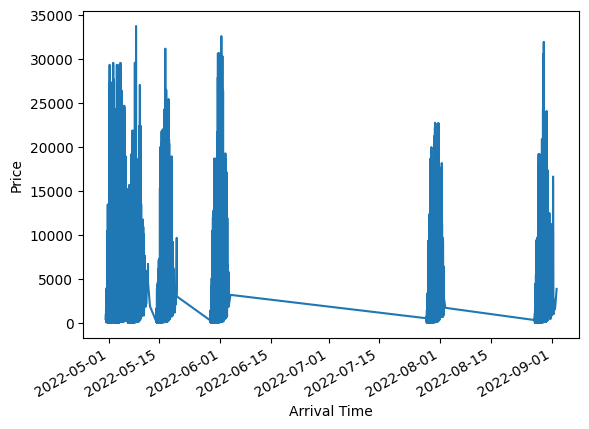

In [22]:
# Line Plot
data_copy = data.copy()
data_copy.set_index('arrival_time', inplace=True)
data_copy['price'].plot()
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.show()
#group by hour of the day, agg(avg)

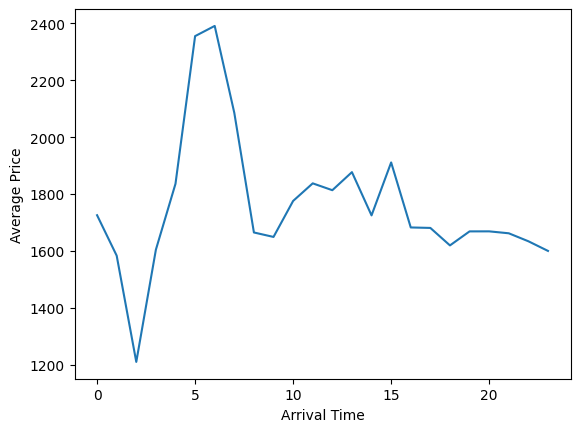

In [23]:
data_copy_copy = data.copy()
data_copy_copy['arrival_time'] = pd.to_datetime(data_copy_copy['arrival_time'])
data_copy_copy.set_index('arrival_time', inplace=True)

# Group by hour of the day and calculate the average price
hourly_avg_price = data_copy_copy.groupby(data_copy_copy.index.hour)['price'].mean()

# Create the line plot
hourly_avg_price.plot()

# Set labels for the axes
plt.xlabel('Arrival Time')
plt.ylabel('Average Price')

# Display the plot
plt.show()


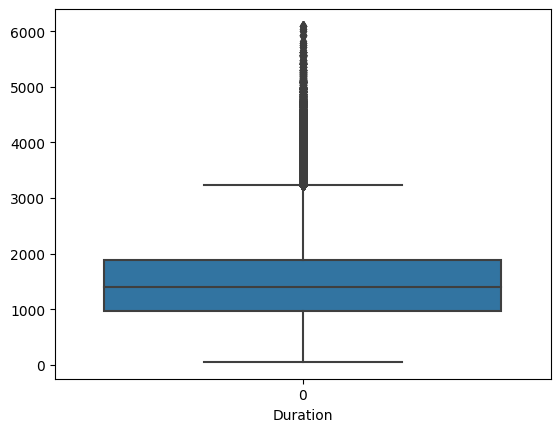

In [24]:
# 4. Outlier Detection
sns.boxplot(data['duration'])
plt.xlabel('Duration')
plt.show()

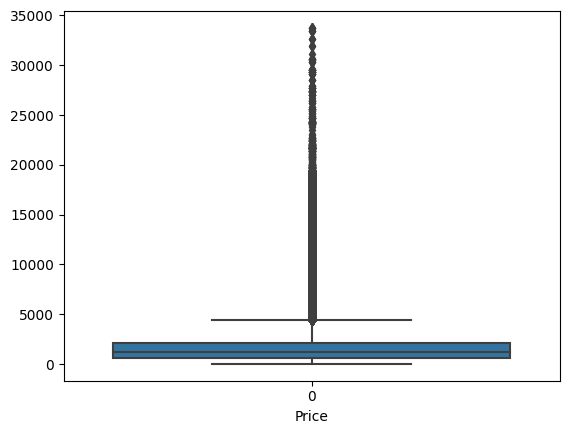

In [25]:
sns.boxplot(data['price'])
plt.xlabel('Price')
plt.show()

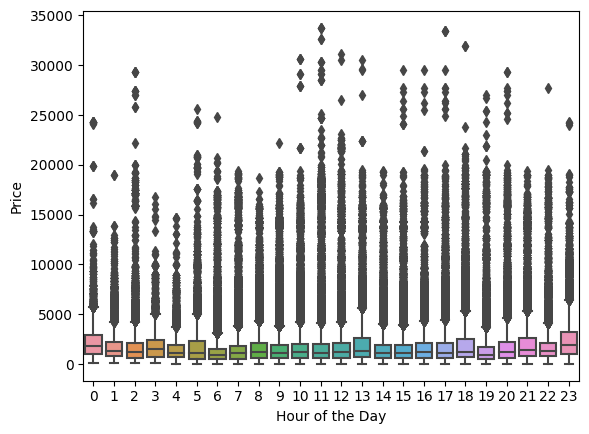

In [26]:
sns.boxplot(data=data, x=data['departure_time'].dt.hour, y='price')
plt.xlabel('Hour of the Day')
plt.ylabel('Price')
plt.show()

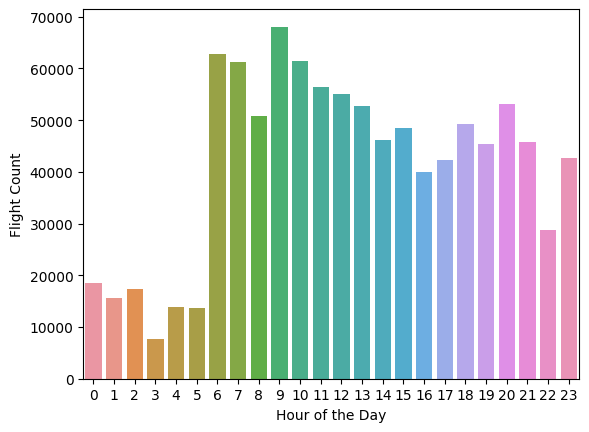

In [27]:
data_copy_copy_c = data.copy()
hourly_flight_counts = data_copy_copy_c['departure_time'].dt.hour.value_counts().sort_index()

# Create the countplot
sns.countplot(x=data_copy_copy_c['departure_time'].dt.hour)

# Set labels for the axes
plt.xlabel('Hour of the Day')
plt.ylabel('Flight Count')

# Display the plot
plt.show()

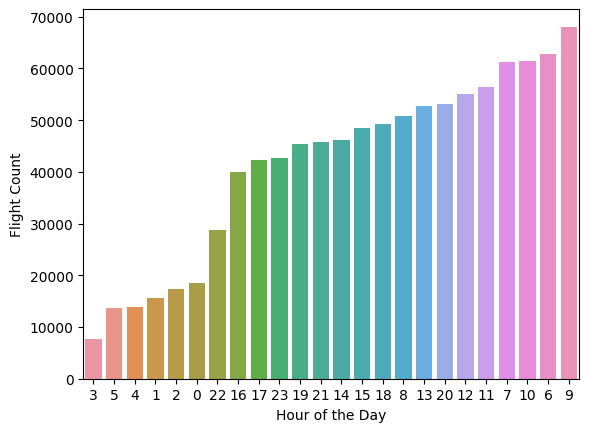

In [28]:
data_copy_copy_c = data.copy()
# Count the number of flights departing in each hour
hourly_flight_counts = data_copy_copy_c['departure_time'].dt.hour.value_counts()

# Order the hours based on the frequency of flights
hour_order = hourly_flight_counts.sort_values().index

# Create the countplot with ordered x-axis
sns.countplot(data=data_copy_copy_c, x=data_copy_copy_c['departure_time'].dt.hour, order=hour_order)

# Set labels for the axes
plt.xlabel('Hour of the Day')
plt.ylabel('Flight Count')

# Display the plot
plt.show()

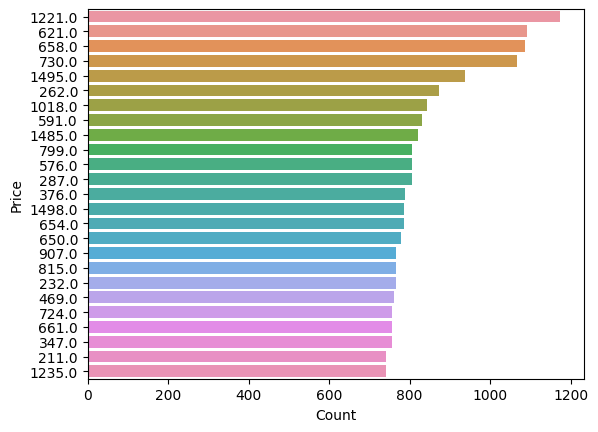

In [40]:
# Group the data by 'price' and calculate the count
price_counts = data.groupby('price').size().reset_index(name='count')

# Sort the price counts in descending order
price_counts = price_counts.sort_values('count', ascending=False)

# Create the countplot with ordered x-axis
sns.countplot(data=data, y='price', order=price_counts['price'].head(25))

# Set labels for the axes
plt.ylabel('Price')
plt.xlabel('Count')

# Rotate x-axis labels for better visibility (optional)
#plt.xticks(rotation=45)

# Display the plot
plt.show()


In [42]:
sns.countplot(data=data, x='duration_by_price')
plt.xlabel('Duration by Price')
plt.ylabel('Count')
plt.show()



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000025D889D78B0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025DA17358B0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.countplot(data=data, x='co2_emissions_per_duration')
plt.xlabel('CO2 Emissions per Duration')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.countplot(data=data, x='emissions_to_price_ratio')
plt.xlabel('Emissions-to-Price Ratio')
plt.ylabel('Count')
plt.show()

In [41]:
z_scores = np.abs((data['price'] - data['price'].mean()) / data['price'].std())
outliers = data[z_scores > 3]
outliers
#standard scaler

,from_airport_code,from_country,dest_airport_code,dest_country,airline_number,airline_name,departure_time,arrival_time,duration,stops,...,avg_co2_emission_for_this_route,co2_percentage,airline_name_1,airline_name_2,airline_name_3,airline_name_4,airline_name_5,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
120,ALG,Algeria,MEL,Australia,multi,Lufthansa| Qantas,2022-04-30 12:35:00,2022-05-03 12:30:00,3775,2,...,1969650.0,176,Lufthansa,Qantas,0,0,0,0.430739,1440.529801,620.492926
122,ALG,Algeria,SYD,Australia,multi,Lufthansa| ANA| JAL,2022-04-30 12:35:00,2022-05-02 06:25:00,1970,2,...,1969650.0,159,Lufthansa,ANA,JAL,0,0,0.235843,2590.862944,611.037950
2276,ALG,Algeria,CAN,China,TK,Turkish Airlines,2022-05-02 13:15:00,2022-05-04 09:40:00,2245,1,...,1348333.0,-14,Turkish Airlines,0,0,0,0,0.142017,516.258352,73.317308
4209,ALG,Algeria,DEL,India,multi,Lufthansa| Etihad,2022-04-30 12:35:00,2022-05-02 03:15:00,2050,2,...,978554.0,-8,Lufthansa,Etihad,0,0,0,0.208970,438.536585,91.641182
4292,ALG,Algeria,DEL,India,multi,Lufthansa| Etihad,2022-05-02 12:25:00,2022-05-04 03:15:00,2060,2,...,978554.0,-21,Lufthansa,Etihad,0,0,0,0.209990,374.757282,78.695209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993673,DEL,India,FLL,United States,multi,Emirates| JetBlue,2022-05-07 04:15:00,2022-05-07 19:33:00,1488,2,...,1411000.0,425,Emirates,JetBlue,0,0,0,0.183976,4983.870968,916.913947
994974,BOM,India,CDG,France,multi,Air India| Etihad| British Airways,2022-05-01 22:30:00,2022-05-02 17:25:00,1345,2,...,816000.0,186,Air India,Etihad,British Airways,0,0,0.164345,1736.059480,285.312805
995239,BOM,India,CDG,France,multi,Air India| SWISS,2022-05-03 20:20:00,2022-05-04 13:50:00,1260,2,...,816000.0,221,Air India,SWISS,0,0,0,0.144231,2080.158730,300.022894
995241,BOM,India,CDG,France,multi,Air India| Saudia,2022-05-03 12:30:00,2022-05-04 07:00:00,1320,1,...,816000.0,288,Air India,Saudia,0,0,0,0.134255,2403.030303,322.620016


In [23]:
# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=np.number).columns

# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()
correlation_matrix

,duration,stops,price,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,duration_by_price,co2_emissions_per_duration,emissions_to_price_ratio
duration,1.000000,0.554036,0.432637,0.492657,0.683935,-0.111159,-0.012646,-0.006587,-0.028230
stops,0.554036,1.000000,0.372308,0.377076,0.527918,-0.068655,-0.201715,0.100701,-0.089241
price,0.432637,0.372308,1.000000,0.722854,0.505430,0.215386,-0.450555,0.530378,-0.406305
co2_emissions,0.492657,0.377076,0.722854,1.000000,0.659790,0.341835,-0.303316,0.806955,0.063103
avg_co2_emission_for_this_route,0.683935,0.527918,0.505430,0.659790,1.000000,-0.257323,-0.326476,0.376757,0.040417
co2_percentage,-0.111159,-0.068655,0.215386,0.341835,-0.257323,1.000000,0.043433,0.414161,0.078023
duration_by_price,-0.012646,-0.201715,-0.450555,-0.303316,-0.326476,0.043433,1.000000,-0.402567,0.596019
co2_emissions_per_duration,-0.006587,0.100701,0.530378,0.806955,0.376757,0.414161,-0.402567,1.000000,0.097947
emissions_to_price_ratio,-0.028230,-0.089241,-0.406305,0.063103,0.040417,0.078023,0.596019,0.097947,1.000000


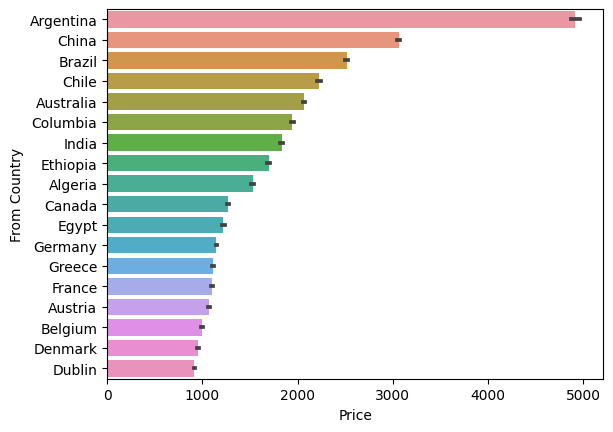

In [54]:
# 8. Comparison Analysis
sns.barplot(data=data, y='from_country', x='price', order=data.groupby('from_country')['price'].mean().sort_values(ascending=False).index)
plt.ylabel('From Country')
plt.xlabel('Price')
plt.show()
#order by desc/asc

In [73]:
price_by_country = data.groupby('from_country')['price'].mean().sort_values(ascending=False)
print(price_by_country)

from_country
Argentina    4918.288973
China        3063.350783
Brazil       2515.447624
Chile        2227.842863
Australia    2066.433569
Columbia     1942.986280
India        1832.280304
Ethiopia     1698.921194
Algeria      1528.192667
Canada       1266.404915
Egypt        1222.224672
Germany      1146.564664
Greece       1108.426712
France       1101.418575
Austria      1072.409204
Belgium       998.184578
Denmark       954.339636
Dublin        916.510219
Name: price, dtype: float64


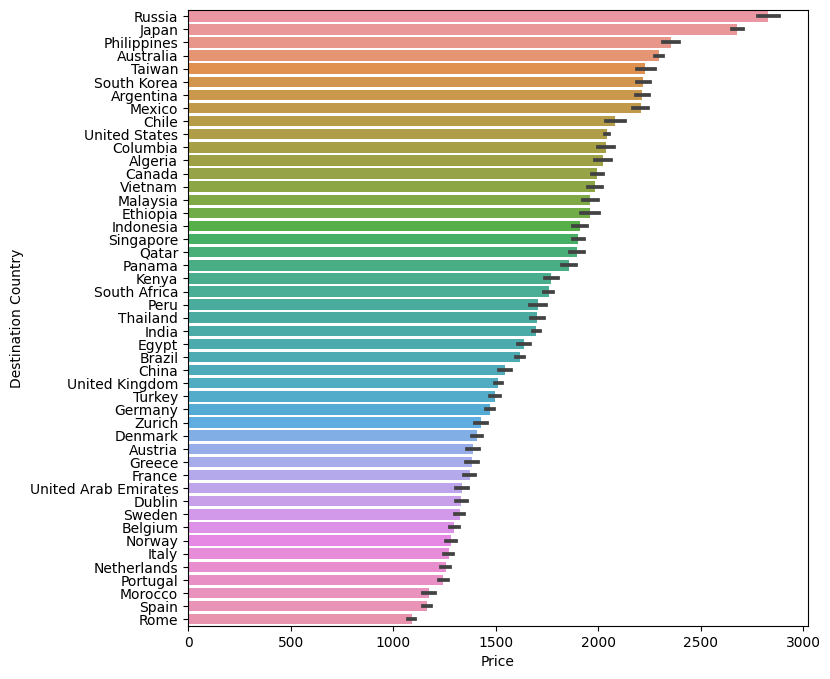

In [56]:
plt.figure(figsize=(8, 8))
sns.barplot(data=data, y='dest_country', x='price', order=data.groupby('dest_country')['price'].mean().sort_values(ascending=False).index)
plt.ylabel('Destination Country')
plt.xlabel('Price')
plt.show()

In [ ]:
#more planes is it cheaper, frequency?
#long distance flights -> threshold?
#local flights, departure = destination


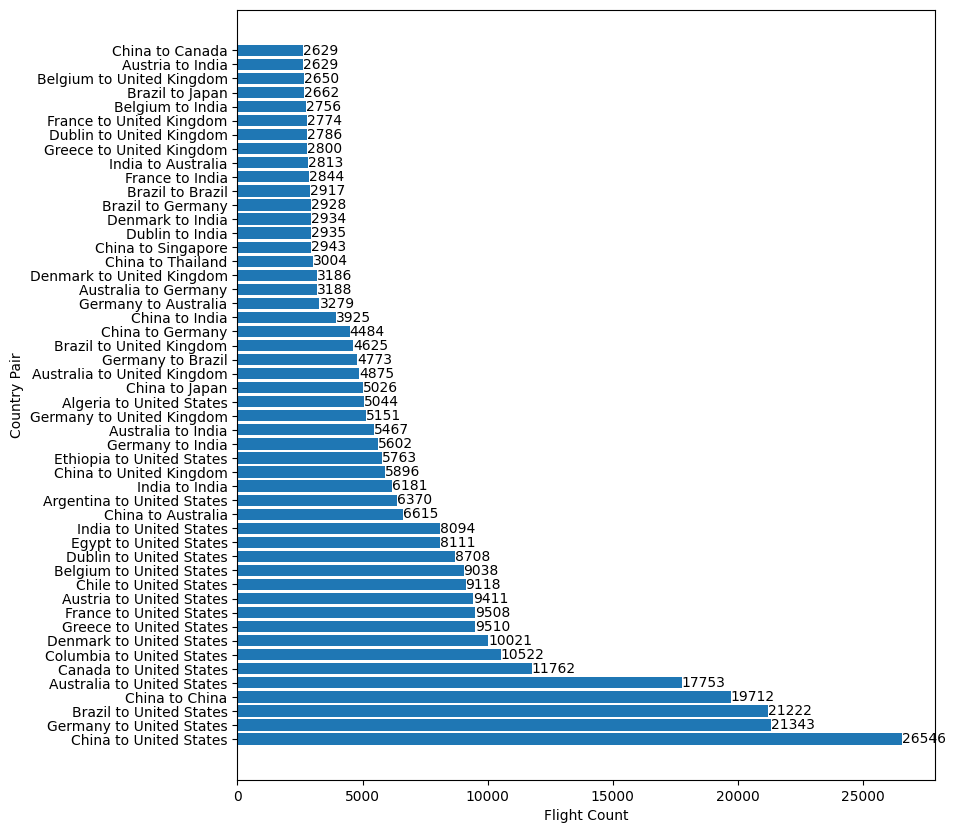

In [137]:
# Group the data by 'from_country' and 'dest_country' and calculate the count
flight_counts = data.groupby(['from_country', 'dest_country']).size().reset_index(name='flight_count')

# Sort the flight counts in descending order
flight_counts = flight_counts.sort_values('flight_count', ascending=False)

# Select the top 100 flight counts
top_flight_counts = flight_counts.head(50)

# Set the figure size
plt.figure(figsize=(9, 10))

# Create a horizontal bar plot
plt.barh(range(len(top_flight_counts)), top_flight_counts['flight_count'])

# Set the tick labels to be the country pairs
plt.yticks(range(len(top_flight_counts)), top_flight_counts['from_country'] + ' to ' + top_flight_counts['dest_country'])

# Set labels for the axes
plt.ylabel('Country Pair')
plt.xlabel('Flight Count')

# Add labels to the bars
for i, count in enumerate(top_flight_counts['flight_count']):
    plt.text(count, i, str(count), ha='left', va='center')

# Display the plot
plt.show()


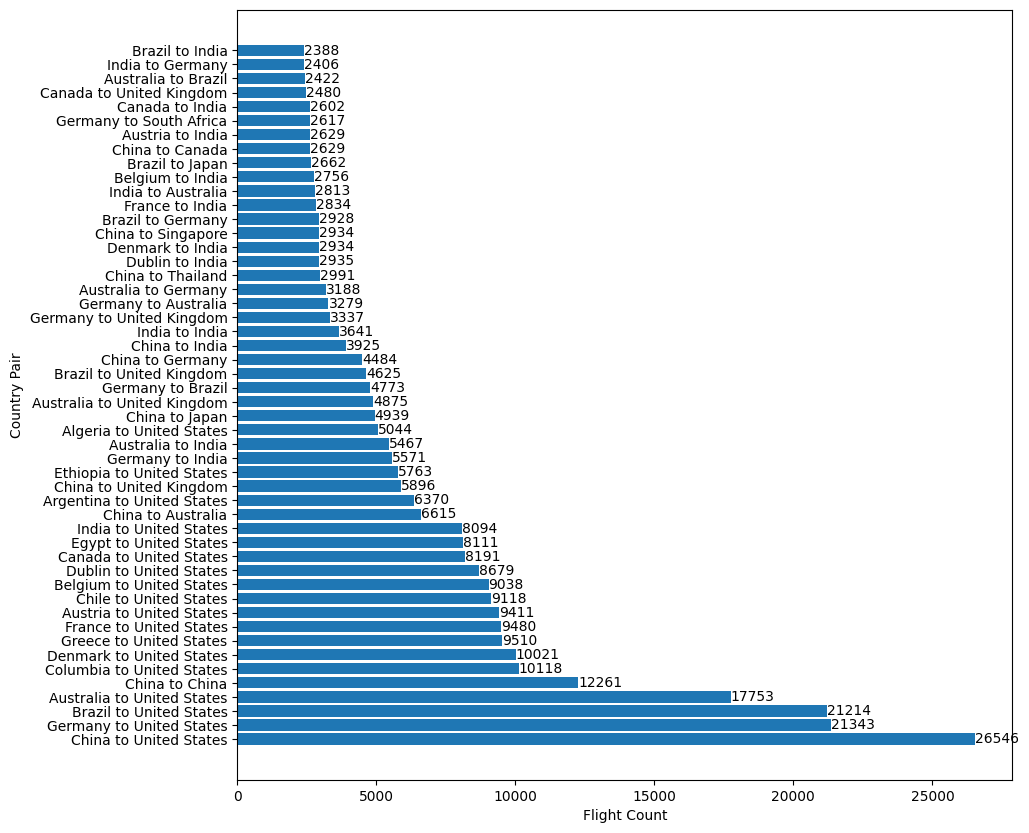

In [140]:
# Set the threshold for long-distance flights (in minutes)
long_distance_threshold = 500

# Filter the data for long-distance flights
long_distance_flights = data[data['duration'] >= long_distance_threshold]

# Group the long-distance flights by 'from_country' and 'dest_country' and calculate the count
long_distance_flight_counts = long_distance_flights.groupby(['from_country', 'dest_country']).size().reset_index(name='flight_count')

# Sort the flight counts in descending order
long_distance_flight_counts = long_distance_flight_counts.sort_values('flight_count', ascending=False)

# Select the top 100 flight counts
top_long_distance_flight_counts = long_distance_flight_counts.head(50)

# Set the figure size
plt.figure(figsize=(10, 10))

# Create a horizontal bar plot
plt.barh(range(len(top_long_distance_flight_counts)), top_long_distance_flight_counts['flight_count'])

# Set the tick labels to be the country pairs
plt.yticks(range(len(top_long_distance_flight_counts)), top_long_distance_flight_counts['from_country'] + ' to ' + top_long_distance_flight_counts['dest_country'])

# Set labels for the axes
plt.ylabel('Country Pair')
plt.xlabel('Flight Count')

# Add labels to the bars
for i, count in enumerate(top_long_distance_flight_counts['flight_count']):
    plt.text(count, i, str(count), ha='left', va='center')

# Display the plot
plt.show()


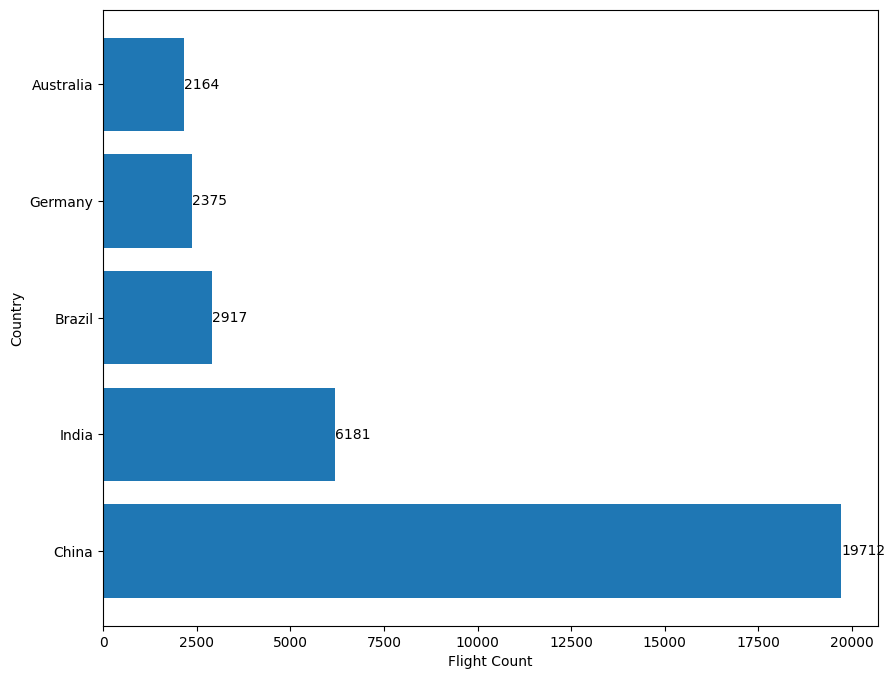

In [141]:
# Filter the data for local flights
local_flights = data[data['from_country'] == data['dest_country']]

# Group the local flights by 'from_country' and calculate the count
local_flight_counts = local_flights.groupby('from_country').size().reset_index(name='flight_count')

# Sort the flight counts in descending order
local_flight_counts = local_flight_counts.sort_values('flight_count', ascending=False)

# Select the top 100 flight counts
top_local_flight_counts = local_flight_counts.head(100)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a horizontal bar plot
plt.barh(range(len(top_local_flight_counts)), top_local_flight_counts['flight_count'])

# Set the tick labels to be the country names
plt.yticks(range(len(top_local_flight_counts)), top_local_flight_counts['from_country'])

# Set labels for the axes
plt.ylabel('Country')
plt.xlabel('Flight Count')

# Add labels to the bars
for i, count in enumerate(top_local_flight_counts['flight_count']):
    plt.text(count, i, str(count), ha='left', va='center')

# Display the plot
plt.show()


In [59]:
# Group the data by 'from_country' and 'dest_country' and calculate the count
flight_counts = data.groupby(['from_country', 'dest_country']).size().reset_index(name='flight_count')

# Sort the flight counts in descending order
busiest_route = flight_counts.sort_values('flight_count', ascending=False).head(1)

# Get the busiest route
busiest_from_country = busiest_route['from_country'].values[0]
busiest_dest_country = busiest_route['dest_country'].values[0]
busiest_flight_count = busiest_route['flight_count'].values[0]

# Print the busiest route information
print(f"The busiest flight route is from {busiest_from_country} to {busiest_dest_country}.")
print(f"It has a total of {busiest_flight_count} flights.")

The busiest flight route is from China to United States.
It has a total of 26546 flights.


In [58]:
most_expensive_flight = data[data['price'] == data['price'].max()]

# Access specific columns of interest
from_country = most_expensive_flight['from_country'].values[0]
dest_country = most_expensive_flight['dest_country'].values[0]
duration = most_expensive_flight['duration'].values[0]
price = most_expensive_flight['price'].values[0]

print(f"The most expensive flight is from {from_country} to {dest_country}.")
print(f"It has a duration of {duration} hours.")
print(f"The price is {price}.")


The most expensive flight is from Argentina to Japan.
It has a duration of 2345 hours.
The price is 33750.0.


In [50]:
cheapest_flight = data[data['price'] == data['price'].min()]

# Access specific columns of interest
from_country = cheapest_flight['from_country'].values[0]
dest_country = cheapest_flight['dest_country'].values[0]
duration = cheapest_flight['duration'].values[0]
price = cheapest_flight['price'].values[0]

print(f"The cheapest flight is from {from_country} to {dest_country}.")
print(f"It has a duration of {duration} hours.")
print(f"The price is {price}.")


The cheapest flight is from Denmark to United Kingdom.
It has a duration of 115 hours.
The price is 9.0.


In [51]:
# Find the flight with the lowest emissions per duration
most_environment_friendly_flight = data[data['co2_emissions_per_duration'] == data['co2_emissions_per_duration'].min()]

# Access specific columns of interest
from_country = most_environment_friendly_flight['from_country'].values[0]
dest_country = most_environment_friendly_flight['dest_country'].values[0]
duration = most_environment_friendly_flight['duration'].values[0]
co2_emissions = most_environment_friendly_flight['co2_emissions'].values[0]
price = most_environment_friendly_flight['price'].values[0]

print(f"The most environmentally friendly flight is from {from_country} to {dest_country}.")
print(f"It has a duration of {duration} hours.")
print(f"The CO2 emissions are {co2_emissions}.")
print(f"The price is {price}.")


The most environmentally friendly flight is from France to Germany.
It has a duration of 2120 hours.
The CO2 emissions are 86000.0.
The price is 278.0.


In [53]:
# Find the flight with the highest emissions per duration
non_environment_friendly_flight = data[data['co2_emissions_per_duration'] == data['co2_emissions_per_duration'].max()]

# Access specific columns of interest
from_country = non_environment_friendly_flight['from_country'].values[0]
dest_country = non_environment_friendly_flight['dest_country'].values[0]
duration = non_environment_friendly_flight['duration'].values[0]
co2_emissions = non_environment_friendly_flight['co2_emissions'].values[0]
price = non_environment_friendly_flight['price'].values[0]

print(f"The most non-environmentally friendly flight is from {from_country} to {dest_country}.")
print(f"It has a duration of {duration} hours.")
print(f"The CO2 emissions are {co2_emissions}.")
print(f"The price is {price}.")


The most non-environmentally friendly flight is from France to China.
It has a duration of 680 hours.
The CO2 emissions are 5396000.0.
The price is 15073.0.


In [54]:
# Find the flight with the lowest emissions-to-price ratio
most_sustainable_flight = data[data['emissions_to_price_ratio'] == data['emissions_to_price_ratio'].min()]

# Access specific columns of interest
from_country = most_sustainable_flight['from_country'].values[0]
dest_country = most_sustainable_flight['dest_country'].values[0]
duration = most_sustainable_flight['duration'].values[0]
co2_emissions = most_sustainable_flight['co2_emissions'].values[0]
price = most_sustainable_flight['price'].values[0]

print(f"The most sustainable flight is from {from_country} to {dest_country} with a duration of {duration} hours.")
print(f"It has CO2 emissions of {co2_emissions} kg and a price of {price}.")


The most sustainable flight is from Germany to Zurich with a duration of 650 hours.
It has CO2 emissions of 99000.0 kg and a price of 2531.0.


In [60]:
# Find the flight with the highest emissions-to-price ratio
most_unsustainable_flight = data[data['emissions_to_price_ratio'] == data['emissions_to_price_ratio'].max()]

# Access specific columns of interest
from_country = most_unsustainable_flight['from_country'].values[0]
dest_country = most_unsustainable_flight['dest_country'].values[0]
duration = most_unsustainable_flight['duration'].values[0]
co2_emissions = most_unsustainable_flight['co2_emissions'].values[0]
price = most_unsustainable_flight['price'].values[0]

print(f"The most unsustainable flight is from {from_country} to {dest_country} with a duration of {duration} hours.")
print(f"It has CO2 emissions of {co2_emissions} kg and a price of {price}.")


The most unsustainable flight is from Denmark to United Kingdom with a duration of 115 hours.
It has CO2 emissions of 125000.0 kg and a price of 9.0.


In [61]:
correlation = data['emissions_to_price_ratio'].corr(data['price'])
print(f"The correlation between emissions-to-price ratio and price is: {correlation}")


The correlation between emissions-to-price ratio and price is: -0.40630460733320906


In [63]:
# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print(correlation_matrix)


                                 duration     stops     price  co2_emissions   
duration                         1.000000  0.554036  0.432637       0.492657  \
stops                            0.554036  1.000000  0.372308       0.377076   
price                            0.432637  0.372308  1.000000       0.722854   
co2_emissions                    0.492657  0.377076  0.722854       1.000000   
avg_co2_emission_for_this_route  0.683935  0.527918  0.505430       0.659790   
co2_percentage                  -0.111159 -0.068655  0.215386       0.341835   
duration_by_price               -0.012646 -0.201715 -0.450555      -0.303316   
co2_emissions_per_duration      -0.006587  0.100701  0.530378       0.806955   
emissions_to_price_ratio        -0.028230 -0.089241 -0.406305       0.063103   

                                 avg_co2_emission_for_this_route   
duration                                                0.683935  \
stops                                                   0.52791

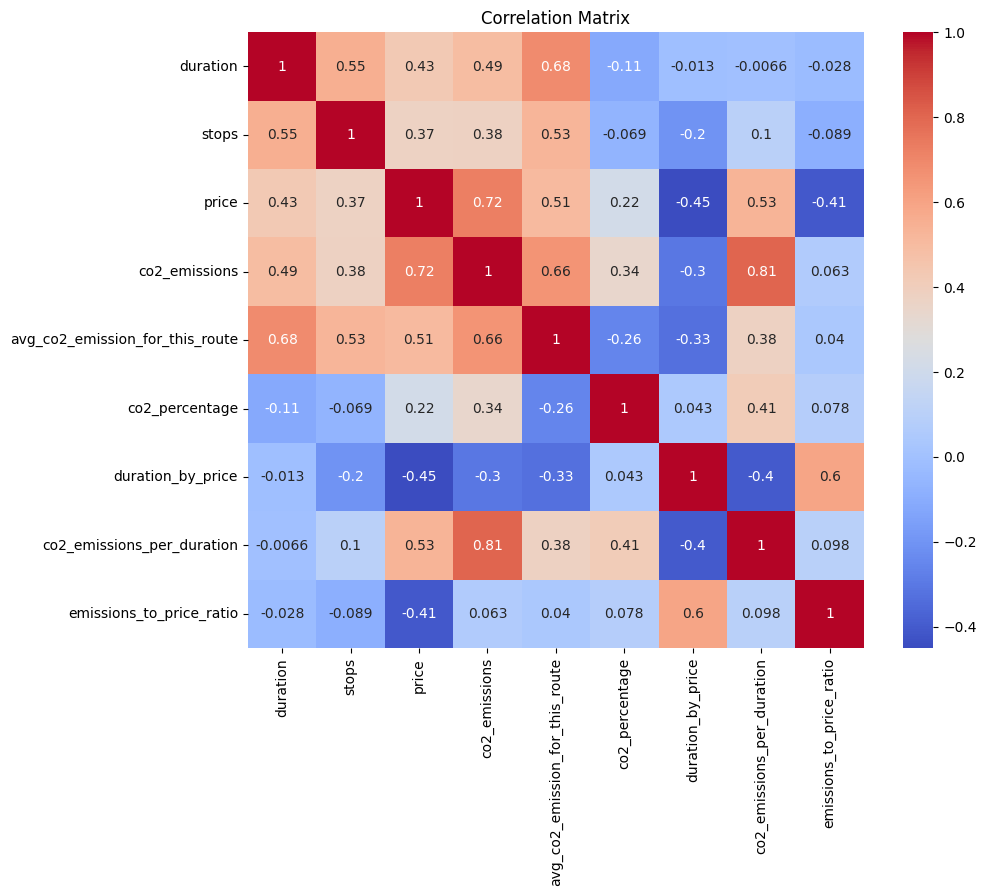

In [65]:
# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [69]:
# Calculate correlation matrix
numeric_columns = data.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

# Find the highest correlated pairs
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out pairs with self-correlation and correlation of 1
highest_corr_pairs = corr_pairs[corr_pairs < 1]

# Print the top correlated pairs
print(highest_corr_pairs.head(10))


co2_emissions_per_duration       co2_emissions                      0.806955
co2_emissions                    co2_emissions_per_duration         0.806955
price                            co2_emissions                      0.722854
co2_emissions                    price                              0.722854
duration                         avg_co2_emission_for_this_route    0.683935
avg_co2_emission_for_this_route  duration                           0.683935
                                 co2_emissions                      0.659790
co2_emissions                    avg_co2_emission_for_this_route    0.659790
duration_by_price                emissions_to_price_ratio           0.596019
emissions_to_price_ratio         duration_by_price                  0.596019
dtype: float64


In [71]:
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
price_correlations

price                              1.000000
co2_emissions                      0.722854
co2_emissions_per_duration         0.530378
avg_co2_emission_for_this_route    0.505430
duration                           0.432637
stops                              0.372308
co2_percentage                     0.215386
emissions_to_price_ratio          -0.406305
duration_by_price                 -0.450555
Name: price, dtype: float64